In [1]:
import cv2
import numpy as np
from ball_tracking import Tracker
from matplotlib import pyplot as plt

In [2]:
cap = cv2.VideoCapture('./downstairs2_cross_court.mp4')
ret, current_frame = cap.read()
if not ret:
    raise RuntimeError("Could not read video")

tracker = Tracker(focal_length_px=1386, confidence_threshold=0.8, image_size=current_frame.shape)

previous_frame = current_frame.copy()

h, w = current_frame.shape[:2]
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter("diff_video.mp4", fourcc, 10, (w, h))

i = 0
heights = []
scores = []
while True:
    ret, current_frame = cap.read()
    i += 1
    print("processing frame", i, end="\r")
    if i < 10:
        continue
    if not ret or i >= 1000:
        break

    detection, score = tracker.track(current_frame)
    
    if not detection is None and score > 0.8:
        heights.append(detection[1][0])
        scores.append(score)
    
    circled_frame = tracker.write_data(current_frame, detection, score)
    video.write(circled_frame)

    previous_frame = current_frame.copy()

video.release()
cap.release()

/home/damian/pingpong/ball_tracking.py:155: RuntimeWarning: divide by zero encountered in scalar divide
  value = (x / (ax1 / 2))**2 + (y / (ax2 / 2))**2
/home/damian/pingpong/ball_tracking.py:155: RuntimeWarning: invalid value encountered in scalar divide
  value = (x / (ax1 / 2))**2 + (y / (ax2 / 2))**2


In [3]:
# plt.imshow(tracker.preprocess(current_frame))

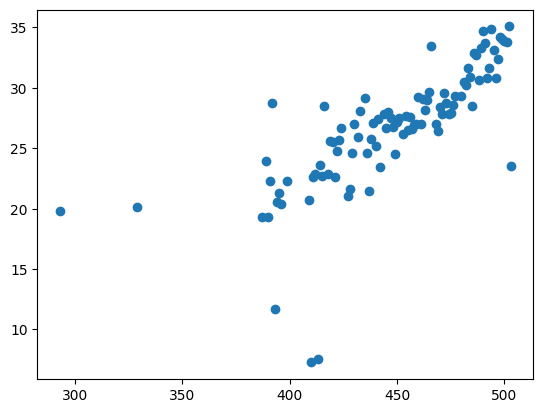

In [4]:
plt.scatter(tracker.frame_numbers, tracker.recorded_sizes)

97 211


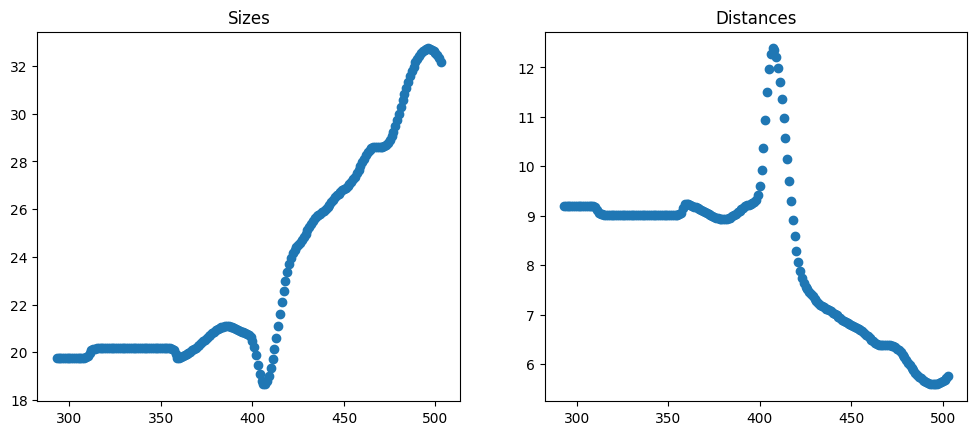

In [5]:
full_frames, smoothed_sizes, smoothed_distances = tracker.smooth_values(sigma=5)
print(len(tracker.frame_numbers), len(smoothed_sizes))

fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
axes[0].scatter(full_frames, smoothed_sizes)
axes[0].set_title("Sizes")
axes[1].scatter(full_frames, smoothed_distances)
axes[1].set_title("Distances")
plt.show()

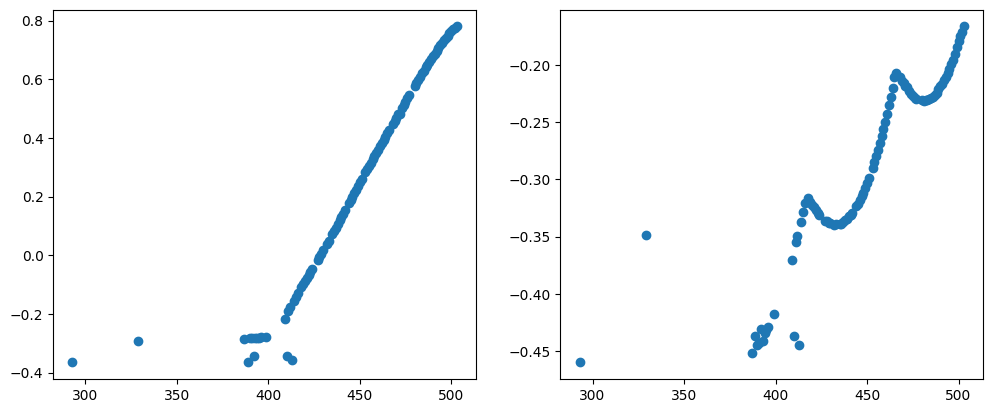

In [6]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
axes[0].scatter(tracker.frame_numbers, [angle[0] for angle in tracker.recorded_angles])
axes[1].scatter(tracker.frame_numbers, [angle[1] for angle in tracker.recorded_angles])

In [7]:
from scatter_animation import video_scatters

xs = [p[0] for p in tracker.recorded_positions]
ys = [p[1] for p in tracker.recorded_positions]
zs = [p[2] for p in tracker.recorded_positions]

angle_x = [angle[0] for angle in tracker.recorded_angles]
angle_y = [angle[1] for angle in tracker.recorded_angles]
distances = tracker.recorded_distances
dense_indexes = list(range(len(angle_x)))

video_scatters([[xs, zs], [dense_indexes, angle_x], [dense_indexes, angle_y], [dense_indexes, distances]], titles=["X / Z", "Angle X", "Angle Y", "Distances"], is_square=[True, False, False, False])


'scatter_multi.mp4'